In [1]:
import os
import numpy as np
import sys
sys.path.append('/usr/bmicnas02/data-biwi-01/jeremy_students/lschlyter/4dflowmri_anomaly_detection')
from config import system as config_sys

In [2]:
results_path = f'{config_sys.project_code_root}/Results/Evaluation'

# Model name
model_name = 'simple_conv' 
preprocessing_method = 'masked_slice'

log_path = os.path.join(results_path, model_name, preprocessing_method)
experiments = os.listdir(log_path)

n = 0
experiments[n]


'20240530-1325_simple_conv_masked_slice_SSL_lr1.000e-03-e1500-bs8-gf_dim8-daFalse__SEED_5_2Dslice__without_rotation_with_cs_skip_updated_ao_S10_balanced_decreased_interpolation_factor_cube_3'

In [3]:
experiment_path = os.path.join(log_path, experiments[n])
inputs_path = os.path.join(experiment_path, 'test/inputs')
outputs_path = os.path.join(experiment_path, 'test/outputs')

subject_id = 'MACDAVD_137_'


if experiment_path.__contains__('SSL'):
    reconstruction_method = False
else:
    reconstruction_method = True

In [4]:
# Load input and output
input = np.load(os.path.join(inputs_path, subject_id + 'inputs.npy')).transpose(1,2,0,3,4)
output = np.load(os.path.join(outputs_path, subject_id + '_anomaly_scores.npy')).transpose(2,3,0,4,1)
input.shape, output.shape


((32, 32, 64, 24, 4), (32, 32, 64, 24, 1))

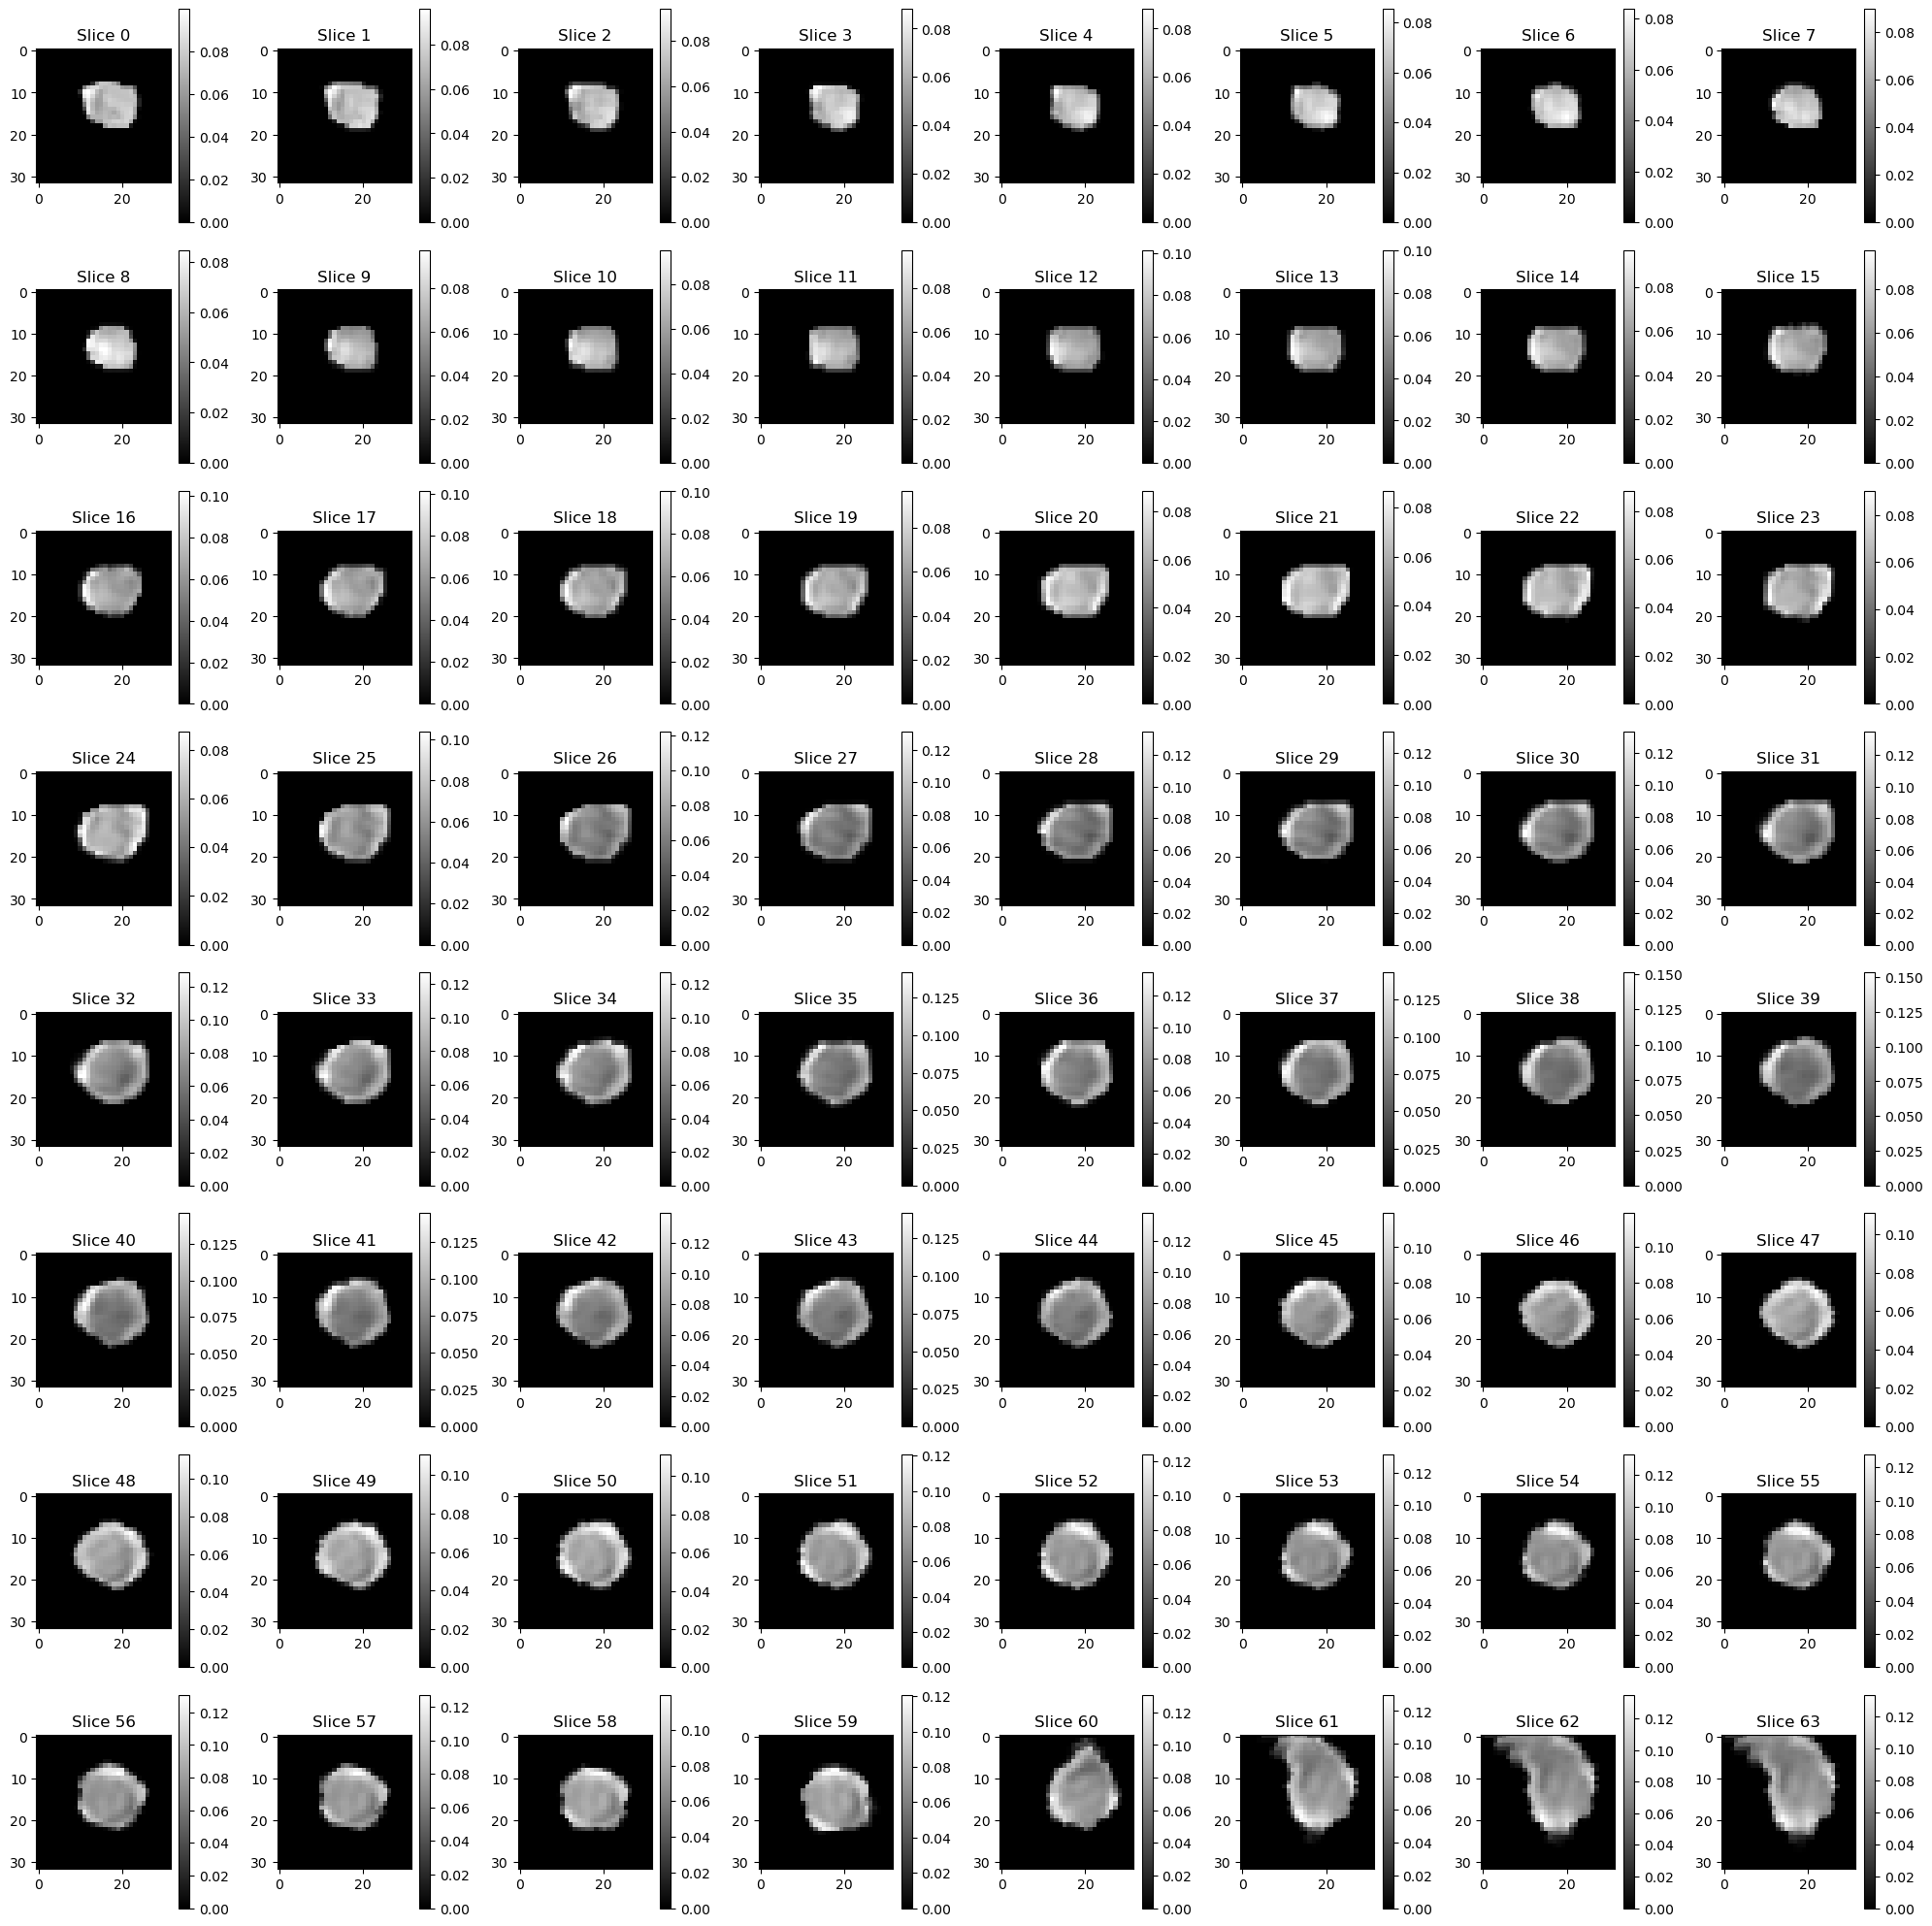

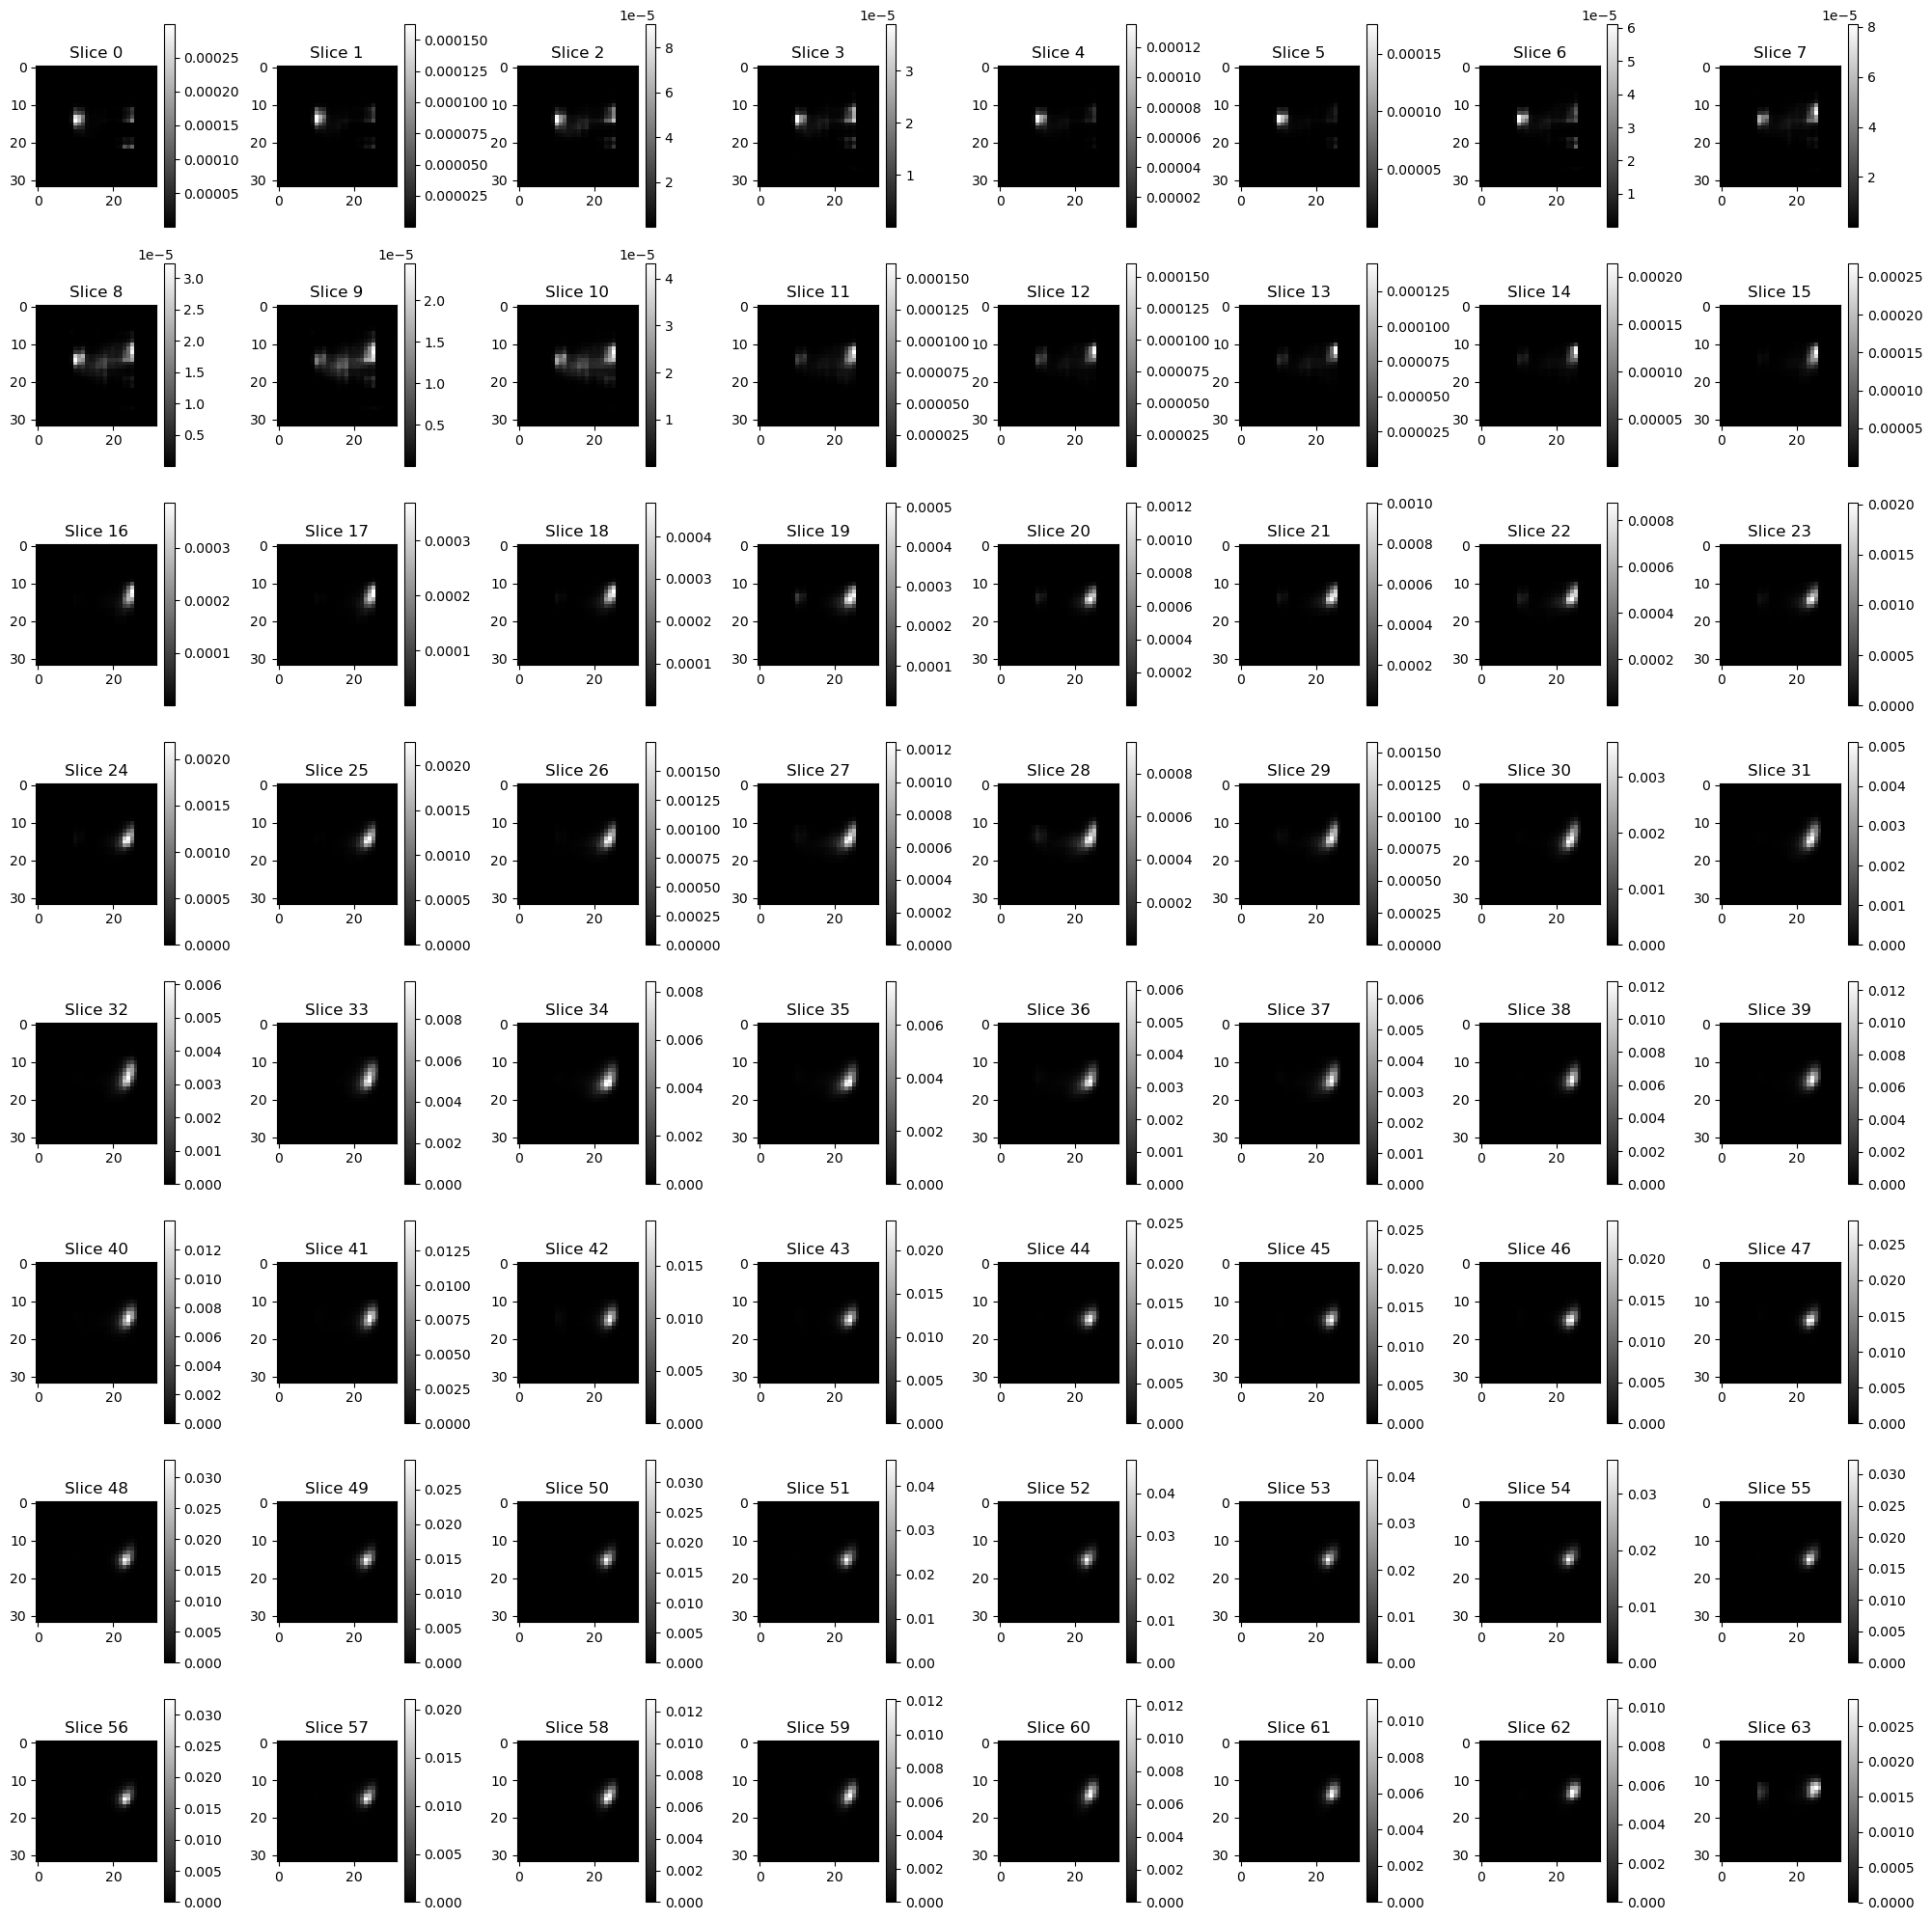

In [5]:
import matplotlib.pyplot as plt

# Set t_ and c
t_ = 4
c = 0

if not reconstruction_method:
    # Only one channel for SSL output
    c = 0

# Create figures and axes
fig_input, axs_input = plt.subplots(8, 8, figsize=(20, 20))
fig_output, axs_output = plt.subplots(8, 8, figsize=(20, 20))
if reconstruction_method:
    fig_difference, axs_difference = plt.subplots(8, 8, figsize=(20, 20))

# Plot input, output, and difference for each slice
for i in range(64):
    row = i // 8
    col = i % 8
    
    im_input = axs_input[row, col].imshow(input[:, :, i, t_, c], cmap='gray')
    fig_input.colorbar(im_input, ax=axs_input[row, col])
    axs_input[row, col].set_title(f"Slice {i}")
    
    im_output = axs_output[row, col].imshow(output[:, :, i, t_, c], cmap='gray')
    fig_output.colorbar(im_output, ax=axs_output[row, col])
    axs_output[row, col].set_title(f"Slice {i}")

    if reconstruction_method:
        im_difference = axs_difference[row, col].imshow(np.abs(input[:, :, i, t_, c] - output[:, :, i, t_, c]), cmap='gray')
        fig_difference.colorbar(im_difference, ax=axs_difference[row, col])
        axs_difference[row, col].set_title(f"Slice {i}")
    
    

# Adjust layout
fig_input.tight_layout()
fig_output.tight_layout()
if reconstruction_method:
    fig_difference.tight_layout()


# Show the figures
plt.show()
